In [1]:
# 1 - Keras with TensorFlow - Data Processing for Neural Network Training

import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

train_labels = []
train_samples = []

# Montando nossa base de dados
# 0 -> sem efeitos colaterais
# 1 -> com efeitos colaterais

for i in range(50):
    # 5% dos jovens que tiveram efeitos colaterais
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # 5% dos velhos que não tiveram efeitos colaterais
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # 95% dos jovens que não tiveram efeitos colaterais 
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # 95% dos velhos que tiveram efeitos colaterais
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)
    

for i in train_samples:
    print(i)

for i in train_labels:
    print(i)

train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels,train_samples)

# MinMaxScaler dimensiona os dados de uma escala de (13,100) para uma escala (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

for i in scaled_train_samples:
    print(i)

# 2 - Create an Artificial Neural Network with TensorFlow's Keras API 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

model = Sequential([
    # A input_layer está implícita antes dessa primeira hidden_layer"
    # O parametro input_shape especifica como aserão os dados de entrada
    Dense(units=16, input_shape=(1, ), activation='relu'),
    # Uma segunda hidden_layer sem o parametro de input_shape
    Dense(units=32, activation='relu'),
    # Uma camada full_connection tambem chamada de output_layer
    Dense(units=2, activation='softmax')
    
    # Ou seja nessa rede temos ao todo 4 layers
])

model.summary()

# 3 - Train an Artificial Neural Network with TensorFlow's Keras API
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# 4 - Build a Validation Set With TensorFlow's Keras API
model.fit(x=scaled_train_samples, y=train_labels,validation_split=0.1, batch_size=10, epochs=30, verbose=2)

# 5 - Neural Network Predictions with TensorFlow's Keras API
test_labels = []
test_samples = []

for i in range(50):
    # 5% dos jovens que tiveram efeitos colaterais
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # 5% dos velhos que não tiveram efeitos colaterais
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    # 95% dos jovens que não tiveram efeitos colaterais 
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # 95% dos velhos que tiveram efeitos colaterais
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)
    
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels,test_samples)

# MinMaxScaler dimensiona os dados de uma escala de (13,100) para uma escala (0,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

predictions = model.predict(x = scaled_test_samples, batch_size=10, verbose=0)

for i in predictions:
    print(i)

# Pegar o indice no np array com a maior probabilidade
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

39
88
33
97
56
98
57
77
56
67
21
95
27
100
14
91
45
77
25
74
13
81
63
78
46
98
35
93
23
87
18
71
50
65
64
89
34
87
17
97
28
73
56
90
57
84
49
96
28
79
41
97
48
87
61
92
58
88
44
68
36
78
24
92
64
65
40
80
28
97
37
78
13
100
51
82
34
80
51
86
46
83
27
97
13
88
61
67
15
94
14
80
26
66
20
90
33
94
52
69
57
88
25
78
34
95
16
71
23
84
18
96
40
83
28
89
22
93
59
70
26
65
38
65
60
75
55
95
55
95
52
86
48
99
44
75
58
74
20
100
44
75
54
76
55
100
37
68
43
65
59
73
61
97
53
98
15
84
13
91
47
75
34
94
64
81
21
87
28
76
17
80
24
78
13
92
16
93
19
93
25
74
23
86
29
98
36
67
62
75
47
78
58
85
44
71
50
81
31
68
53
94
24
79
20
80
44
97
32
89
16
78
23
80
24
96
30
74
13
99
32
95
27
88
60
90
16
65
29
86
21
72
25
67
39
74
47
67
34
78
36
96
36
87
31
92
60
84
38
88
58
88
62
93
52
66
34
69
25
89
19
98
15
87
30
83
45
93
37
66
60
93
38
90
54
68
33
96
27
86
29
84
13
78
27
89
26
66
36
78
42
80
47
94
39
69
43
91
47
74
61
93
39
91
40
72
42
82
50
70
45
65
54
65
29
77
56
90
51
92
31
98
42
90
37
81
58
70
61
95
52
86


[0.65517241]
[0.3908046]
[0.98850575]
[0.97701149]
[0.45977011]
[0.81609195]
[0.3908046]
[0.18390805]
[0.97701149]
[0.67816092]
[0.57471264]
[0.45977011]
[0.16091954]
[0.93103448]
[0.74712644]
[0.42528736]
[0.56321839]
[0.11494253]
[0.11494253]
[0.63218391]
[0.27586207]
[0.66666667]
[0.91954023]
[0.14942529]
[0.16091954]
[0.25287356]
[0.71264368]
[0.83908046]
[0.90804598]
[0.37931034]
[0.79310345]
[0.35632184]
[0.64367816]
[0.05747126]
[0.86206897]
[0.27586207]
[0.36781609]
[0.44827586]
[0.96551724]
[0.65517241]
[0.87356322]
[0.63218391]
[0.01149425]
[0.18390805]
[0.59770115]
[0.95402299]
[1.]
[0.75862069]
[0.86206897]
[0.81609195]
[0.87356322]
[1.]
[0.1954023]
[0.96551724]
[0.66666667]
[0.26436782]
[0.66666667]
[0.86206897]
[0.59770115]
[0.59770115]
[0.67816092]
[0.45977011]
[0.73563218]
[0.]
[0.3908046]
[1.]
[0.93103448]
[0.83908046]
[0.6091954]
[0.55172414]
[0.52873563]
[0.02298851]
[0.74712644]
[0.09195402]
[0.88505747]
[0.35632184]
[0.64367816]
[0.71264368]
[0.83908046]
[0.8620689

[0.25287356]
[0.31034483]
[0.45977011]
[0.02298851]
[0.95402299]
[0.91954023]
[0.67816092]
[0.2183908]
[0.5862069]
[0.74712644]
[0.95402299]
[0.18390805]
[0.74712644]
[0.43678161]
[0.83908046]
[0.10344828]
[0.62068966]
[1.]
[0.50574713]
[0.35632184]
[0.50574713]
[0.]
[0.42528736]
[0.57471264]
[0.7816092]
[0.91954023]
[0.34482759]
[0.97701149]
[0.6091954]
[0.04597701]
[0.42528736]
[0.67816092]
[0.64367816]
[0.63218391]
[0.59770115]
[0.93103448]
[0.50574713]
[0.96551724]
[0.62068966]
[0.27586207]
[0.7816092]
[0.44827586]
[0.10344828]
[0.10344828]
[0.81609195]
[0.75862069]
[0.10344828]
[0.97701149]
[0.51724138]
[0.03448276]
[0.7816092]
[0.1954023]
[0.5862069]
[0.28735632]
[0.94252874]
[0.63218391]
[0.70114943]
[0.08045977]
[0.87356322]
[0.74712644]
[0.33333333]
[0.97701149]
[0.45977011]
[0.98850575]
[0.44827586]
[0.97701149]
[0.63218391]
[0.26436782]
[0.40229885]
[0.85057471]
[0.83908046]
[0.57471264]
[0.2183908]
[0.65517241]
[0.16091954]
[0.96551724]
[0.14942529]
[0.56321839]
[0.35632184

[0.17241379]
[0.96551724]
[0.67816092]
[0.75862069]
[0.22988506]
[0.90804598]
[0.50574713]
[0.10344828]
[0.75862069]
[0.74712644]
[0.77011494]
[0.59770115]
[0.4137931]
[1.]
[0.90804598]
[0.8045977]
[0.66666667]
[0.74712644]
[0.6091954]
[0.40229885]
[0.83908046]
[0.70114943]
[0.88505747]
[0.42528736]
[0.28735632]
[0.16091954]
[1.]
[0.89655172]
[0.2183908]
[0.85057471]
[0.35632184]
[0.45977011]
[0.64367816]
[0.90804598]
[0.72413793]
[0.2183908]
[0.08045977]
[0.16091954]
[0.4137931]
[0.12643678]
[0.89655172]
[0.74712644]
[0.20689655]
[0.11494253]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None

[0.9536318  0.04636817]
[0.92142934 0.07857066]
[0.07636201 0.92363805]
[0.95342857 0.04657139]
[0.04206696 0.957933  ]
[0.06790205 0.9320979 ]
[0.13723099 0.862769  ]
[0.38061836 0.61938155]
[0.9536318  0.04636817]
[0.12332096 0.87667906]
[0.0274277  0.97257227]
[0.95107174 0.04892827]
[0.7521982  0.24780181]
[0.04469166 0.9553083 ]
[0.11064015 0.8893599 ]
[0.86384314 0.13615684]
[0.9536318  0.04636817]
[0.77438504 0.22561498]
[0.95133907 0.04866091]
[0.9508029  0.04919704]
[0.95317215 0.04682784]
[0.7521982  0.24780181]
[0.15243717 0.8475628 ]
[0.95362663 0.04637333]
[0.945833   0.05416696]
[0.27320948 0.72679055]
[0.06400556 0.93599445]
[0.06031819 0.93968177]
[0.4099783 0.5900217]
[0.9521329  0.04786712]
[0.07636201 0.92363805]
[0.95291436 0.04708562]
[0.09911577 0.9008843 ]
[0.24950226 0.7504978 ]
[0.04206696 0.957933  ]
[0.04747202 0.95252794]
[0.9536163  0.04638367]
[0.9536215 0.0463785]
[0.05353273 0.94646734]
[0.7285942  0.27140576]
[0.04469166 0.9553083 ]
[0.953637 0.046363]


[0.77438504 0.22561498]
[0.95361114 0.04638883]
[0.9536318  0.04636817]
[0.2272092 0.7727908]
[0.7036277 0.2963723]
[0.8902523  0.10974765]
[0.7285942  0.27140576]
[0.95364213 0.04635784]
[0.7521982  0.24780181]
[0.9536473  0.04635267]
[0.95361114 0.04638883]
[0.03101269 0.9689873 ]
[0.953606   0.04639401]
[0.9508029  0.04919704]
[0.4099783 0.5900217]
[0.53181195 0.46818805]
[0.95291436 0.04708562]
[0.03725326 0.96274674]
[0.56224763 0.43775234]
[0.8776597 0.1223403]
[0.7521982  0.24780181]
[0.04206696 0.957933  ]
[0.08143187 0.9185682 ]
[0.9536008  0.04639917]
[0.945833   0.05416696]
[0.2272092 0.7727908]
[0.11064015 0.8893599 ]
[0.79512644 0.20487356]
[0.03725326 0.96274674]
[0.07201752 0.92798245]
[0.03725326 0.96274674]
[0.05353273 0.94646734]
[0.04469166 0.9553083 ]
[0.95265526 0.04734477]
[0.84873515 0.15126483]
[0.95342857 0.04657139]
[0.24950226 0.7504978 ]
[0.95265526 0.04734477]
[0.95364213 0.04635784]
[0.9521329  0.04786712]
[0.09911577 0.9008843 ]
[0.08143187 0.9185682 ]
[0

1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
0
0
0
0
1
1
1
0
0
1
0
1
1
0
1
0
0
0
0
1
1
1
0
1
0
1
1
1
1
1
0
0
1
1
1
0
1
0
1
0
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
1
0
1
0
0
0
1
1
0
0
1
1
1
0
0
1
1
1
1
1
0
1
1
0
1
0
1
1
0
0
1
1
0
1
1
1
0
1
0
0
0
0
0
1
0
0
0
0
1
1
0
0
1
1
1
1
1
1
0
1
0
1
0
1
1
1
0
1
1
0
0
1
0
1
1
0
1
0
1
1
1
1
0
1
0
0
1
1
1
0
1
1
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
1
0
0
1
1
1
0
1
0
1
0
0
0
1
0
1
1
1
0
1
0
1
0
1
1
0
0
1
0
1
1
0
0
0
1
1
1
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
1
0
1
0
1
0
1
0
1
1
1
0
0
1
1
1
0
1
1
1
1
1
0
0
1
1
1
0
0
1
1
1
0
1
0
0
1
1
0
1
0
0
0
1
1
1
1
0
0
1
1
1
0
0
1
0
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
0
1
0
0
0
0
0
0
1
0
1
0
1
1
0
0
1
0
1
1
1
0
0
1
0
1
0
1
0
1
0
1
0
0
0
0
1
1
0
1
1
1
0
0
1
1
0
0
1
0
0
1
0
0
1
0
1
0
1
1
1
1
0
1
0
1
1
1
1
0
0
1
0
1
1
1
0
0
0
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
1
0
1
0
0
1
0
1
0
0
1
1
1
1
0
1
0
0
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
1
1
0
0
1
0
0
1
1
1
1
1
0
0
0
1
1
0
1
0
0
1
1
0
0
1
1
0
0


In [2]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [3]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [6]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    ticks_marks = np.arange(len(classes))
    plt.xticks(ticks_marks, classes, rotation=45)
    plt.yticks(ticks_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    print(cm)
    
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 964   86]
 [  47 1003]]


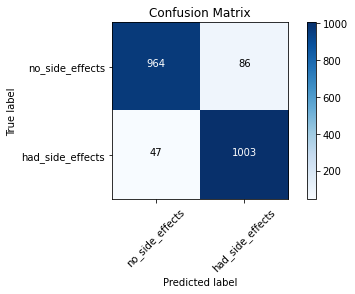

In [7]:
cm_plot_labels = ["no_side_effects", "had_side_effects"]

plot_confusion_matrix(cm = cm, classes=cm_plot_labels, title="Confusion Matrix")